### 1. Importing everything we need

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### A function that draws graphs

In [ ]:
def make_graphic(model, name, X, Y):
    color_dots = ListedColormap([plt.cm.Set1(0), plt.cm.Set1(4), plt.cm.Set1(1)])
    color_background = ListedColormap([plt.cm.Pastel1(0), plt.cm.Pastel1(5), plt.cm.Pastel1(1)])
    
    plt.figure(name, figsize = (8, 6))
    x = np.linspace(-3, 2.5, 1000)
    y = np.linspace(-3, 2, 1000)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    z = model.predict(xy).reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap=color_background)
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=color_dots)

### 2. Formulating training and test selections

In [3]:
iris = load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   shuffle = True, test_size=0.33, random_state = 0, stratify = y)

### 3. Preprocessing data

In [4]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### 4.1 Random Forest

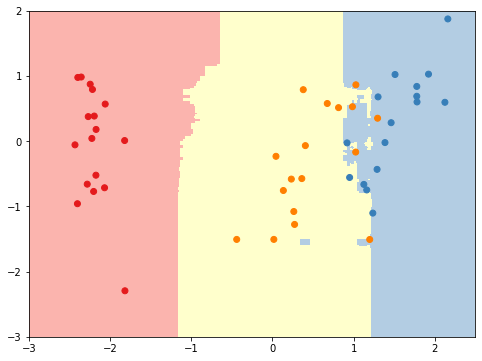

In [5]:
r_forest = RandomForestClassifier()  
r_forest.fit(X_train, y_train)       
y_pred = r_forest.predict(X_test)   

make_graphic(r_forest, 1, X_test, y_test)

### 4.2 Metrics of our model Random Forest

In [6]:
print("\nConfusion matrix : \n", confusion_matrix(y_test, y_pred))
print("\n\nClassification report:\n\n", classification_report(y_test, y_pred))


Confusion matrix : 
 [[17  0  0]
 [ 0 14  3]
 [ 0  2 14]]


Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.82      0.85        17
           2       0.82      0.88      0.85        16

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



### 5.1 Naive Bayes

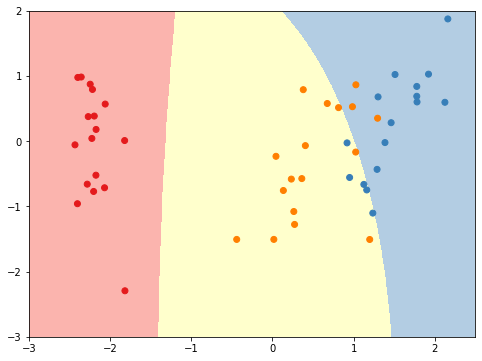

In [7]:
n_bayes = GaussianNB()
n_bayes.fit(X_train, y_train)
y_pred = n_bayes.predict(X_test)   

make_graphic(n_bayes, 2, X_test, y_test)

### 5.2 Metrics of our model Naive Bayes

In [8]:
print("\nConfusion matrix : \n", confusion_matrix(y_test, y_pred))
print("\n\nClassification report:\n\n", classification_report(y_test, y_pred))


Confusion matrix : 
 [[17  0  0]
 [ 0 14  3]
 [ 0  5 11]]


Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.74      0.82      0.78        17
           2       0.79      0.69      0.73        16

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50

